In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib
from matplotlib import colors,colorbar
import matplotlib
%matplotlib inline
import csv 
import math
import bq
import time

In [2]:
client = bq.Client.Get()
def Query(q):
    t0 = time.time()
    answer = client.ReadTableRows(client.Query(q)['configuration']['query']['destinationTable'])
    print 'Query time: ' + str(time.time() - t0) + ' seconds.'
    return answer

In [3]:
q = '''
select speed, 
count(*) count 
from 
(SELECT integer(avg(speed)) speed, 
mmsi FROM [pipeline_normalize.20160113] where speed is not null group by mmsi) 
group by speed, order by speed asc
'''
vessel_query = Query(q)

Waiting on bqjob_r3c7d7f7922512cbe_0000015314cbc332_1 ... (1s) Current status: DONE   
Query time: 3.80331301689 seconds.


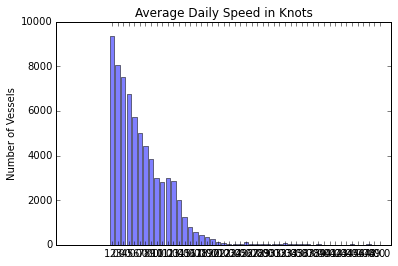

In [22]:
speeds,counts = [],[]

for row in vessel_query:
    if float(row[0]) < 50 and float(row[0])>0: # no boats go faster than 50 knots for sustained time on the ocean
        speeds.append(float(row[0]))
        counts.append(float(row[1]))
        
y_pos = np.arange(len(speeds))
plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, speeds)
plt.ylabel('Number of Vessels')
plt.title('Average Daily Speed in Knots')
plt.show()


In [26]:
speeds,counts = [],[]

for row in vessel_query:
    if float(row[0])>0: # no boats go faster than 50 knots for sustained time on the ocean
        speeds.append(float(row[0]))
        counts.append(float(row[1]))

speeds = np.array(speeds)
counts = np.array(counts)

for i in range(len(speeds)):
    print int(speeds[i]), counts[0:i+1].sum() /counts.sum()

1 0.132400872942
2 0.246846923448
3 0.353513023269
4 0.449494090639
5 0.530723011082
6 0.601706204121
7 0.664739392909
8 0.719156534308
9 0.761684097157
10 0.801278235978
11 0.843579060737
12 0.884037638523
13 0.912620808888
14 0.930561460193
15 0.942040075957
16 0.950316016212
17 0.956763880622
18 0.961596236148
19 0.965167361052
20 0.966981265765
21 0.968044100558
22 0.968795170479
23 0.969276988918
24 0.969659609444
25 0.971317631721
26 0.971572712071
27 0.971912819205
28 0.972224584077
29 0.972635546864
30 0.972961482867
31 0.973485814698
32 0.974364424794
33 0.974647847405
34 0.975455601848
35 0.975809880112
36 0.97600827594
37 0.976093302724
38 0.976546778902
39 0.976674319077
40 0.976816030383
41 0.976901057166
42 0.97698608395
43 0.977085281864
44 0.977425388998
45 0.977581271434
46 0.977751325001
47 0.977963891959
48 0.978091432134
49 0.978162287787
50 0.978247314571
51 0.979905336848
52 0.980075390415
53 0.980259615112
54 0.980528866593
55 0.981180738599
56 0.981591701386
57 